In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from iminuit import Minuit

In [117]:
filename = "LDRealTimeCorrelationsDiffpoint05.csv"

tdiff = 0.05

if filename[:2] == 'HD':
    title = 'High Density Phase'
    alpha = 0.75
    beta = 0.25
elif filename[:2] == 'LD':
    title = 'Low Density Phase'
    alpha = 0.25
    beta = 0.75
else:
    title = 'Maximal Current Phase'
    alpha = 0.75
    beta = 0.75

In [131]:
df = pd.read_csv(filename)
df.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1


In [119]:
av_tau_u = np.array(df.mean(axis=0))
av_tau_0 = av_tau_u[0]
new_df = df.mul(df.iloc[:, 0], axis=0)
av_tau_product = np.array(new_df.mean(axis=0))

corr_func = av_tau_product - av_tau_0 * av_tau_u

In [120]:
def model_func(t, A, k):
    return A * np.exp(-k * t)

def linear_func(t, A, k):
    return np.log(A) - k*t

def LSQ1(A, k):
    return np.sum((corr_func - model_func(t, A, k)) ** 2)

def LSQ2(A, k):
    return np.sum((np.log(corr_func) - linear_func(t, A, k)) ** 2)

In [132]:
t = np.arange(0, len(corr_func)*tdiff, tdiff)

200

In [122]:
fit1 = Minuit(LSQ1, A=0.3, k=0.5)
fit1.errordef = 1.
fit1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.01665                    │              Nfcn = 28               │
│ EDM = 5.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │    0.2    │    0.4    │            │            │         │         │       │
│ 1 │ k    │    0.7    │    2.8    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     A     k │
├───┼─────────────┤
│ A │ 0.162 0.859 │
│ k │ 0.859  7.58 │
└───┴─────────────┘

In [123]:
# get parameter best estimates
A_fit1 = fit1.values["A"]
k_fit1 = fit1.values["k"]

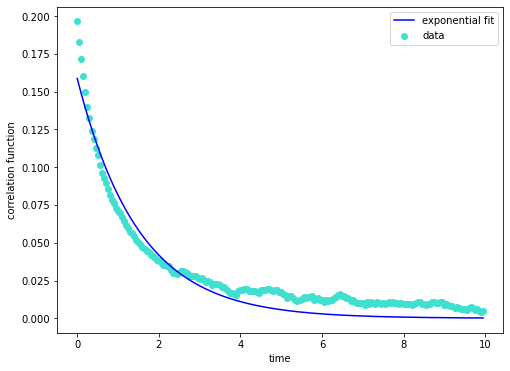

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(t, corr_func, color='turquoise', label='data')
plt.plot(t, model_func(t, A_fit1, k_fit1), color='blue', label='exponential fit')
plt.ylabel('correlation function')
plt.xlabel('time')
plt.legend(loc='best')
plt.savefig('LDCorrelationsGraph1')
plt.show()

In [125]:
fit2 = Minuit(LSQ2, A=0.3, k=0.5)
fit2.errordef = 1.
fit2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.67                      │              Nfcn = 64               │
│ EDM = 1.15e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.075   │   0.011   │            │            │         │         │       │
│ 1 │ k    │   0.272   │   0.024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        A        k │
├───┼───────────────────┤
│ A │ 0.000112 0.000225 │
│ k │ 0.000225 0.000599 │
└───┴───────────────────┘

In [126]:
A_fit2 = fit2.values["A"]
k_fit2 = fit2.values["k"]

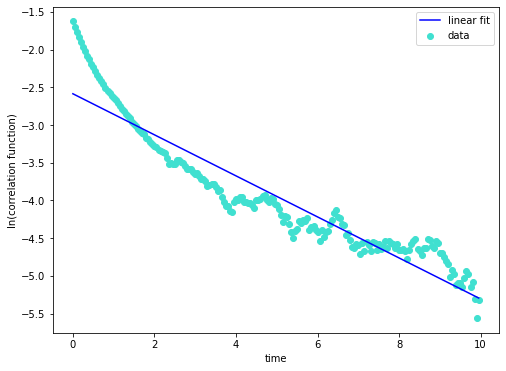

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(t, np.log(corr_func), color='turquoise', label='data')
plt.plot(t, linear_func(t, A_fit2, k_fit2), color='blue', label='linear fit')
plt.ylabel('ln(correlation function)')
plt.xlabel('time')
plt.legend(loc='best')
plt.savefig('LDCorrelationsGraph2')
plt.show()